<a href="https://colab.research.google.com/github/majid-lagzian/869_course/blob/main/Zindi_Loan_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Zindi Competition- Loan Default Prediction

In [123]:
import pandas as pd
import os.path as osp
import numpy as np
import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [124]:
# First, we import our data from the appropriate files
trainperf_path = osp.join(osp.curdir,'Zindi','trainperf.csv')
trainperf_data = pd.read_csv(trainperf_path, parse_dates=['approveddate','creationdate'])
testperf_path = osp.join(osp.curdir,'Zindi','testperf.csv')
testperf_data = pd.read_csv(testperf_path, parse_dates=['approveddate','creationdate'])
trainperf_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
0,8a2a81a74ce8c05d014cfb32a0da1049,301994762,12,2017-07-25 08:22:56,2017-07-25 07:22:47,30000.0,34500.0,30,NaN,Good
1,8a85886e54beabf90154c0a29ae757c0,301965204,2,2017-07-05 17:04:41,2017-07-05 16:04:18,15000.0,17250.0,30,NaN,Good
2,8a8588f35438fe12015444567666018e,301966580,7,2017-07-06 14:52:57,2017-07-06 13:52:51,20000.0,22250.0,15,NaN,Good
3,8a85890754145ace015429211b513e16,301999343,3,2017-07-27 19:00:41,2017-07-27 18:00:35,10000.0,11500.0,15,NaN,Good
4,8a858970548359cc0154883481981866,301962360,9,2017-07-03 23:42:45,2017-07-03 22:42:39,40000.0,44000.0,30,NaN,Good


In [49]:
traindemo_path = osp.join(osp.curdir,'Zindi','traindemographics.csv')
traindemo_data = pd.read_csv(traindemo_path, parse_dates=['birthdate'])
testdemo_path = osp.join(osp.curdir,'Zindi','testdemographics.csv')
testdemo_data = pd.read_csv(testdemo_path, parse_dates=['birthdate'])
traindemo_data.head()

,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
0,8a858e135cb22031015cbafc76964ebd,1973-10-10,Savings,3.319219,6.528604,GT Bank,NaN,NaN,NaN
1,8a858e275c7ea5ec015c82482d7c3996,1986-01-21,Savings,3.325598,7.119403,Sterling Bank,NaN,Permanent,NaN
2,8a858e5b5bd99460015bdc95cd485634,1987-04-01,Savings,5.746100,5.563174,Fidelity Bank,NaN,NaN,NaN
3,8a858efd5ca70688015cabd1f1e94b55,1991-07-19,Savings,3.362850,6.642485,GT Bank,NaN,Permanent,NaN
4,8a858e785acd3412015acd48f4920d04,1982-11-22,Savings,8.455332,11.971410,GT Bank,NaN,Permanent,NaN


In [50]:
trainprev_path = osp.join(osp.curdir,'Zindi','trainprevloans.csv')
trainprev_data = pd.read_csv(trainprev_path, parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])
testprev_path = osp.join(osp.curdir,'Zindi','testprevloans.csv')
testprev_data = pd.read_csv(testprev_path, parse_dates=['approveddate','creationdate','closeddate',
                                                                           'firstduedate','firstrepaiddate'])
trainprev_data.head()

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
0,8a2a81a74ce8c05d014cfb32a0da1049,301682320,2,2016-08-15 18:22:40,2016-08-15 17:22:32,10000.0,13000.0,30,2016-09-01 16:06:48,NaN,2016-09-14,2016-09-01 15:51:43
1,8a2a81a74ce8c05d014cfb32a0da1049,301883808,9,2017-04-28 18:39:07,2017-04-28 17:38:53,10000.0,13000.0,30,2017-05-28 14:44:49,NaN,2017-05-30,2017-05-26 00:00:00
2,8a2a81a74ce8c05d014cfb32a0da1049,301831714,8,2017-03-05 10:56:25,2017-03-05 09:56:19,20000.0,23800.0,30,2017-04-26 22:18:56,NaN,2017-04-04,2017-04-26 22:03:47
3,8a8588f35438fe12015444567666018e,301861541,5,2017-04-09 18:25:55,2017-04-09 17:25:42,10000.0,11500.0,15,2017-04-24 01:35:52,NaN,2017-04-24,2017-04-24 00:48:43
4,8a85890754145ace015429211b513e16,301941754,2,2017-06-17 09:29:57,2017-06-17 08:29:50,10000.0,11500.0,15,2017-07-14 21:18:43,NaN,2017-07-03,2017-07-14 21:08:35


##Dataset sizes and information

In [51]:
print('Train Demographic: {} Rows, {} Columns'.format(*traindemo_data.shape))
print('Train Performance: {} Rows, {} Columns'.format(*trainperf_data.shape))
print('Train Previous Loan: {} Rows, {} Columns'.format(*trainprev_data.shape))
print('Test Demographic: {} Rows, {} Columns'.format(*testdemo_data.shape))
print('Test Performance: {} Rows, {} Columns'.format(*testperf_data.shape))
print('Test Previous Loan: {} Rows, {} Columns'.format(*testprev_data.shape))

Train Demographic: 4346 Rows, 9 Columns
Train Performance: 4368 Rows, 10 Columns
Train Previous Loan: 18183 Rows, 12 Columns
Test Demographic: 1487 Rows, 9 Columns
Test Performance: 1450 Rows, 9 Columns
Test Previous Loan: 5907 Rows, 12 Columns


##Number of performance rows existing in other datasets

In [52]:
print('Train Performance has {} IDs in common with Train Demographic'.format(trainperf_data['customerid'].isin(traindemo_data['customerid']).sum()))
print('Train Performance has {} IDs in common with Test Demographic'.format(trainperf_data['customerid'].isin(testdemo_data['customerid']).sum()))
print('Train Performance has {} IDs in common with Train Previous Loan'.format(trainperf_data['customerid'].isin(trainprev_data['customerid']).sum()))
print('Train Performance has {} IDs in common with Test Previous Loan'.format(trainperf_data['customerid'].isin(testprev_data['customerid']).sum()))
print('-'*100)
print('Test Performance has {} IDs in common with Train Demographic'.format(testperf_data['customerid'].isin(traindemo_data['customerid']).sum()))
print('Test Performance has {} IDs in common with Test Demographic'.format(testperf_data['customerid'].isin(testdemo_data['customerid']).sum()))
print('Test Performance has {} IDs in common with Train Previous Loan'.format(testperf_data['customerid'].isin(trainprev_data['customerid']).sum()))
print('Test Performance has {} IDs in common with Test Previous Loan'.format(testperf_data['customerid'].isin(testprev_data['customerid']).sum()))

Train Performance has 3269 IDs in common with Train Demographic
Train Performance has 1099 IDs in common with Test Demographic
Train Performance has 4359 IDs in common with Train Previous Loan
Train Performance has 0 IDs in common with Test Previous Loan
----------------------------------------------------------------------------------------------------
Test Performance has 1065 IDs in common with Train Demographic
Test Performance has 385 IDs in common with Test Demographic
Test Performance has 0 IDs in common with Train Previous Loan
Test Performance has 1442 IDs in common with Test Previous Loan


Conclusion: We need to merge train and test demographic datasets, but we won't merge test and train performance datasets to prevent data leakage.

##Cleaning previous loans dataset

In [53]:
trainprev_data.drop_duplicates(keep='last',inplace=True)
trainprev_data.describe(include='all')

<ipython-input-53-82d46cc58b1a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trainprev_data.describe(include='all')
<ipython-input-53-82d46cc58b1a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trainprev_data.describe(include='all')
<ipython-input-53-82d46cc58b1a>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trainprev_data.describe(include='all')
<ipython-input-53-82d46cc58b1a>

,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,closeddate,referredby,firstduedate,firstrepaiddate
count,18183,1.818300e+04,18183.000000,18183,18183,18183.000000,18183.000000,18183.000000,18183,1026,18183,18183
unique,4359,NaN,NaN,18172,18173,NaN,NaN,NaN,17955,521,363,18011
top,8a858f7d5578012a01557ea194d94948,NaN,NaN,2017-04-20 14:00:44,2017-06-12 10:38:36,NaN,NaN,NaN,2016-11-07 00:53:42,8a858fc55b2548dd015b286e452c678c,2017-07-03 00:00:00,2016-08-04 00:00:00
freq,26,NaN,NaN,2,2,NaN,NaN,NaN,5,14,398,7
first,NaN,NaN,NaN,2016-01-15 08:53:28,2016-01-15 07:53:17,NaN,NaN,NaN,2016-02-02 08:18:15,NaN,2016-02-15 00:00:00,2016-02-02 08:13:55
last,NaN,NaN,NaN,2017-07-28 10:47:43,2017-07-28 09:46:34,NaN,NaN,NaN,2017-07-30 22:09:11,NaN,2017-08-22 00:00:00,2017-07-30 21:59:01
mean,NaN,3.018395e+08,4.189353,NaN,NaN,16501.237420,19573.202931,26.692790,NaN,NaN,NaN,NaN
std,NaN,9.367767e+04,3.249490,NaN,NaN,9320.547516,10454.245277,10.946556,NaN,NaN,NaN,NaN
min,NaN,3.016001e+08,1.000000,NaN,NaN,3000.000000,3450.000000,15.000000,NaN,NaN,NaN,NaN
25%,NaN,3.017766e+08,2.000000,NaN,NaN,10000.000000,11500.000000,15.000000,NaN,NaN,NaN,NaN


In [54]:
#Interest Ratio
trainprev_data['interestratio'] = trainprev_data['totaldue']/trainprev_data['loanamount']

# Days before due
trainprev_data['days_remained'] = trainprev_data['termdays']- (trainprev_data['closeddate'] - trainprev_data['approveddate']).dt.days

# Default or not
trainprev_data['goodflag'] = trainprev_data.apply(lambda x: 0 if (x['days_remained']<0) else 1, axis=1)

In [55]:
new_trainprev=trainprev_data.groupby('customerid').agg({'loanamount':'mean','interestratio':'mean','termdays':'mean',
                                                        'days_remained':'mean','goodflag':'sum'})
new_trainprev.rename(columns={'loanamount':'avgprevloans','interestratio':'avginterest','termdays':'avgtermdays',
                              'days_remained':'avgdays_remained', 'goodflag':'goodflags'},inplace=True)

In [56]:
new_trainprev.head()

,avgprevloans,avginterest,avgtermdays,avgdays_remained,goodflags
customerid,,,,,
8a1088a0484472eb01484669e3ce4e0b,10000.000000,1.150000,15.000000,-7.00,0
8a1a1e7e4f707f8b014f797718316cad,17500.000000,1.281250,37.500000,6.25,3
8a1a32fc49b632520149c3b8fdf85139,12857.142857,1.171429,19.285714,1.00,6
8a1eb5ba49a682300149c3c068b806c7,16250.000000,1.258750,33.750000,5.25,8
8a1edbf14734127f0147356fdb1b1eb2,10000.000000,1.225000,22.500000,4.50,2


##Converting the test previous loan dataset to the same format

In [57]:
testprev_data.drop_duplicates(keep='last',inplace=True)
testprev_data['interestratio'] = testprev_data['totaldue']/testprev_data['loanamount']
testprev_data['days_remained'] = (testprev_data['approveddate'] - testprev_data['closeddate']).dt.days +testprev_data['termdays']
testprev_data['goodflag'] = testprev_data.apply(lambda x: 0 if (x['days_remained']<0) else 1, axis=1)
new_testprev=testprev_data.groupby('customerid').agg({'loanamount':'mean','interestratio':'mean','termdays':'mean',
                                                        'days_remained':'mean','goodflag':'sum'})
new_testprev.rename(columns={'loanamount':'avgprevloans','interestratio':'avginterest','termdays':'avgtermdays',
                              'days_remained':'avgdays_remained', 'goodflag':'goodflags'},inplace=True)

## Merging and cleaning demographic data

In [58]:
demographic_data=pd.concat([traindemo_data,testdemo_data])
demographic_data.drop_duplicates(keep='last',inplace=True)
demographic_data.describe(include='all')

<ipython-input-58-9c38d9f11bd4>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  demographic_data.describe(include='all')


,customerid,birthdate,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,bank_branch_clients,employment_status_clients,level_of_education_clients
count,5818,5818,5818,5818.000000,5818.000000,5818,65,4953,795
unique,5818,4078,3,NaN,NaN,18,55,6,4
top,8a858e135cb22031015cbafc76964ebd,1980-09-22 00:00:00,Savings,NaN,NaN,GT Bank,APAPA,Permanent,Graduate
freq,1,6,4570,NaN,NaN,2128,3,4205,576
first,NaN,1961-10-13 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,1996-03-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,4.576024,7.220867,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,6.983480,3.047189,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-149.033700,-74.005974,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.354953,6.473605,NaN,NaN,NaN,NaN


In [59]:
# Age
demographic_data['Age'] = datetime.datetime.now().year - demographic_data['birthdate'].dt.year

In [60]:
# Bank account types
demographic_data["bank_account_type"].value_counts()

Savings    4570
Other      1168
Current      80
Name: bank_account_type, dtype: int64

In [62]:
# Bank names
larger_50=demographic_data["bank_name_clients"].value_counts()[demographic_data["bank_name_clients"].value_counts()>=50]
otherbanks=demographic_data["bank_name_clients"].value_counts()[demographic_data["bank_name_clients"].value_counts()<50]
print(larger_50)
print('\nTotal number of other banks is',otherbanks.sum())

GT Bank          2128
First Bank        790
Access Bank       567
UBA               461
Zenith Bank       412
Diamond Bank      392
EcoBank           202
Stanbic IBTC      193
FCMB              168
Skye Bank         146
Fidelity Bank     139
Sterling Bank      67
Name: bank_name_clients, dtype: int64

Total number of other banks is 153


In [63]:
# Employment status
demographic_data["employment_status_clients"].value_counts()

Permanent        4205
Self-Employed     470
Student           189
Unemployed         79
Retired             8
Contract            2
Name: employment_status_clients, dtype: int64

In [64]:
# Level of education
demographic_data["level_of_education_clients"].value_counts()

Graduate         576
Secondary        118
Post-Graduate     90
Primary           11
Name: level_of_education_clients, dtype: int64

In [65]:
demographic_data.drop(['birthdate','bank_branch_clients'],axis=1,inplace=True)
demographic_data["bank_account_type"] = demographic_data["bank_account_type"].replace("Current", "Other")

#demographic_data["bank_name_clients"] = demographic_data["bank_name_clients"].replace(otherbanks.index.tolist(),'Other')

job_replacement={'Retired':'Other','Contract':'Other',np.nan:'Missing'}
demographic_data["employment_status_clients"] = demographic_data["employment_status_clients"].replace(job_replacement)

edu_replacement={'Graduate':'Post-Secondary','Post-Graduate':'Post-Secondary','Secondary':'Secondary_Or_Less','Primary':'Secondary_Or_Less',np.nan:'Missing'}
demographic_data["level_of_education_clients"] = demographic_data["level_of_education_clients"].replace(edu_replacement)

demographic_data.describe(include='all')

,customerid,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age
count,5818,5818,5818.000000,5818.000000,5818,5818,5818,5818.000000
unique,5818,2,NaN,NaN,18,6,3,NaN
top,8a858e135cb22031015cbafc76964ebd,Savings,NaN,NaN,GT Bank,Permanent,Missing,NaN
freq,1,4570,NaN,NaN,2128,4205,5023,NaN
mean,NaN,NaN,4.576024,7.220867,NaN,NaN,NaN,38.960639
std,NaN,NaN,6.983480,3.047189,NaN,NaN,NaN,6.174445
min,NaN,NaN,-149.033700,-74.005974,NaN,NaN,NaN,27.000000
25%,NaN,NaN,3.354953,6.473605,NaN,NaN,NaN,35.000000
50%,NaN,NaN,3.588480,6.621319,NaN,NaN,NaN,38.000000
75%,NaN,NaN,6.556336,7.426570,NaN,NaN,NaN,43.000000


##Cleaning performance data

In [66]:
trainperf_data.drop_duplicates(inplace=True)
#Converting the labels to binary
labels = {'Good':1,'Bad':0}
trainperf_data['good_bad_flag'] = trainperf_data['good_bad_flag'].map(labels)
trainperf_data.describe(include='all')

<ipython-input-66-740a9e698a71>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trainperf_data.describe(include='all')
<ipython-input-66-740a9e698a71>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  trainperf_data.describe(include='all')


,customerid,systemloanid,loannumber,approveddate,creationdate,loanamount,totaldue,termdays,referredby,good_bad_flag
count,4368,4.368000e+03,4368.000000,4368,4368,4368.000000,4368.000000,4368.000000,587,4368.000000
unique,4368,NaN,NaN,4362,4364,NaN,NaN,NaN,521,NaN
top,8a2a81a74ce8c05d014cfb32a0da1049,NaN,NaN,2017-07-24 15:06:11,2017-07-05 13:28:44,NaN,NaN,NaN,8a858fc55b2548dd015b286e452c678c,NaN
freq,1,NaN,NaN,2,2,NaN,NaN,NaN,8,NaN
first,NaN,NaN,NaN,2017-07-01 01:35:26,2017-07-01 00:35:20,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-07-30 22:55:51,2017-07-30 21:55:43,NaN,NaN,NaN,NaN,NaN
mean,NaN,3.019810e+08,5.172390,NaN,NaN,17809.065934,21257.377679,29.261676,NaN,0.782051
std,NaN,1.343115e+04,3.653569,NaN,NaN,10749.694571,11943.510416,11.512519,NaN,0.412900
min,NaN,3.019585e+08,2.000000,NaN,NaN,10000.000000,10000.000000,15.000000,NaN,0.000000
25%,NaN,3.019691e+08,2.000000,NaN,NaN,10000.000000,13000.000000,30.000000,NaN,1.000000


In [67]:
trainperf_data['referredby'] = trainperf_data.apply(lambda x: 0 if pd.isna(x['referredby'])  else 1, axis=1)

#Interest Ratio
trainperf_data['loaninterest'] = trainperf_data['totaldue']/trainperf_data['loanamount']

trainperf_data.drop(columns=['systemloanid','creationdate','approveddate','totaldue'],inplace=True)

In [68]:
trainperf_data['good_bad_flag'].value_counts()

1    3416
0     952
Name: good_bad_flag, dtype: int64

Doing the same cleaning on the test performance dataset:

In [69]:
testperf_data.drop_duplicates(inplace=True)
testperf_data['referredby'] = testperf_data.apply(lambda x: 0 if pd.isna(x['referredby'])  else 1, axis=1)
#Interest Ratio
testperf_data['loaninterest'] = testperf_data['totaldue']/testperf_data['loanamount']
testperf_data.drop(columns=['systemloanid','creationdate','approveddate','totaldue'],inplace=True)
testperf_data.describe(include='all')

,customerid,loannumber,loanamount,termdays,referredby,loaninterest
count,1450,1450.000000,1450.000000,1450.000000,1450.000000,1450.000000
unique,1450,NaN,NaN,NaN,NaN,NaN
top,8a858899538ddb8e015390510b321f08,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.088966,17482.758621,28.810345,0.126897,1.217978
std,NaN,3.665210,10585.420034,11.074839,0.332972,0.075386
min,NaN,2.000000,10000.000000,15.000000,0.000000,1.045000
25%,NaN,2.000000,10000.000000,30.000000,0.000000,1.150000
50%,NaN,4.000000,10000.000000,30.000000,0.000000,1.225000
75%,NaN,7.000000,20000.000000,30.000000,0.000000,1.300000


##Final merging and feature engineering

In [70]:
#left merge with previous loans dataset
train_df = trainperf_data.merge(new_trainprev, how='left', on='customerid')
test_df=testperf_data.merge(new_testprev, how='left', on='customerid')

#left merge with demographic dataset
train_df = train_df.merge(demographic_data, how='left', on='customerid')
test_df=test_df.merge(demographic_data, how='left', on='customerid')

train_df[['avgprevloans','avginterest','avgtermdays','avgdays_remained','goodflags']]=train_df[['avgprevloans','avginterest','avgtermdays','avgdays_remained','goodflags']].fillna(0)
test_df[['avgprevloans','avginterest','avgtermdays','avgdays_remained','goodflags']]=test_df[['avgprevloans','avginterest','avgtermdays','avgdays_remained','goodflags']].fillna(0)

In [71]:
train_df.describe(include='all')

,customerid,loannumber,loanamount,termdays,referredby,good_bad_flag,loaninterest,avgprevloans,avginterest,avgtermdays,avgdays_remained,goodflags,bank_account_type,longitude_gps,latitude_gps,bank_name_clients,employment_status_clients,level_of_education_clients,Age
count,4368,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368.000000,4368,4368.000000,4368.000000,4368,4368,4368,4368.000000
unique,4368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,18,6,3,NaN
top,8a2a81a74ce8c05d014cfb32a0da1049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Savings,NaN,NaN,GT Bank,Permanent,Missing,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3417,NaN,NaN,1604,3130,3763,NaN
mean,NaN,5.172390,17809.065934,29.261676,0.134386,0.782051,1.217742,12882.906423,1.222166,25.287190,2.601382,3.298764,NaN,4.539944,7.253575,NaN,NaN,NaN,38.973214
std,NaN,3.653569,10749.694571,11.512519,0.341106,0.412900,0.077056,4849.816080,0.084598,6.955384,7.749600,3.250235,NaN,7.422612,2.988238,NaN,NaN,NaN,6.165971
min,NaN,2.000000,10000.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-121.000000,0.000000,NaN,-149.033700,-33.868818,NaN,NaN,NaN,27.000000
25%,NaN,2.000000,10000.000000,30.000000,0.000000,1.000000,1.150000,10000.000000,1.150000,19.903846,0.000000,1.000000,NaN,3.354974,6.474631,NaN,NaN,NaN,35.000000
50%,NaN,4.000000,10000.000000,30.000000,0.000000,1.000000,1.225000,10000.000000,1.225000,27.857143,2.333333,2.000000,NaN,3.583420,6.622692,NaN,NaN,NaN,38.000000
75%,NaN,7.000000,20000.000000,30.000000,0.000000,1.000000,1.300000,14285.714286,1.300000,30.000000,6.000000,5.000000,NaN,6.533464,7.429028,NaN,NaN,NaN,43.000000


##Defining dummy variables

In [72]:
from sklearn.preprocessing import OneHotEncoder

dummy_encoder= OneHotEncoder(sparse=False, handle_unknown='ignore',drop='first')
train_cat=train_df[['bank_account_type', 'bank_name_clients', 'employment_status_clients','level_of_education_clients']]
test_cat=test_df[['bank_account_type', 'bank_name_clients', 'employment_status_clients','level_of_education_clients']]

dummy_encoder.fit(train_cat)

train_dummy = dummy_encoder.transform(train_cat)
test_dummy = dummy_encoder.transform(test_cat)
feature_names = dummy_encoder.get_feature_names_out(input_features=train_cat.columns)
train_dummy_df = pd.DataFrame(train_dummy, columns=feature_names)
test_dummy_df = pd.DataFrame(test_dummy, columns=feature_names)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [73]:
train_df = pd.concat([train_df, train_dummy_df], axis=1)
test_df = pd.concat([test_df, test_dummy_df], axis=1)
train_df=train_df.drop(['bank_account_type', 'bank_name_clients', 'employment_status_clients','level_of_education_clients'],axis=1)
test_df=test_df.drop(['bank_account_type', 'bank_name_clients', 'employment_status_clients','level_of_education_clients'],axis=1)

In [74]:
train_df.columns

Index(['customerid', 'loannumber', 'loanamount', 'termdays', 'referredby',
       'good_bad_flag', 'loaninterest', 'avgprevloans', 'avginterest',
       'avgtermdays', 'avgdays_remained', 'goodflags', 'longitude_gps',
       'latitude_gps', 'Age', 'bank_account_type_Savings',
       'bank_name_clients_Diamond Bank', 'bank_name_clients_EcoBank',
       'bank_name_clients_FCMB', 'bank_name_clients_Fidelity Bank',
       'bank_name_clients_First Bank', 'bank_name_clients_GT Bank',
       'bank_name_clients_Heritage Bank', 'bank_name_clients_Keystone Bank',
       'bank_name_clients_Skye Bank', 'bank_name_clients_Stanbic IBTC',
       'bank_name_clients_Standard Chartered',
       'bank_name_clients_Sterling Bank', 'bank_name_clients_UBA',
       'bank_name_clients_Union Bank', 'bank_name_clients_Unity Bank',
       'bank_name_clients_Wema Bank', 'bank_name_clients_Zenith Bank',
       'employment_status_clients_Other',
       'employment_status_clients_Permanent',
       'employment_statu

##Model Assessment Metrics

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,roc_auc_score,classification_report,roc_auc_score,roc_curve,auc

def model(algorithm,dtrain_X,dtrain_Y,dtest_X,dtest_Y):

    algorithm.fit(dtrain_X,dtrain_Y)
    predictions = algorithm.predict(dtest_X)
    print (algorithm)

    print ("Accuracy score : ", accuracy_score(predictions,dtest_Y))
    print ("Recall score   : ", recall_score(predictions,dtest_Y))
    print ("classification report :\n",classification_report(predictions,dtest_Y))

    fig = plt.figure(figsize=(6,4))
    ax  = fig.add_subplot(111)
    prediction_probabilities = algorithm.predict_proba(dtest_X)[:,1]
    fpr , tpr , thresholds   = roc_curve(dtest_Y,prediction_probabilities)
    ax.plot(fpr,tpr,label   = ["Area under curve : ",auc(fpr,tpr)],linewidth=2,linestyle="dotted")
    ax.plot([0,1],[0,1],linewidth=2,linestyle="dashed")
    plt.legend(loc="best")
    plt.title("ROC-CURVE & AREA UNDER CURVE")

##Classifiers

In [76]:
X=train_df.drop(['customerid','good_bad_flag'],axis=1)
y=train_df['good_bad_flag']

In [77]:
X.shape

(4368, 38)

In [126]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import f1_score, make_scorer
from sklearn.ensemble import VotingClassifier

## Logistic Regression

In [91]:
# Perform feature selection
selector = SelectKBest(score_func=f_classif, k=28)
X_selected = selector.fit_transform(X, y)

# Get the names of the selected features
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]

X_train, X_val, y_train, y_val = train_test_split(X_selected, y, stratify=y, test_size=0.2, random_state=42)

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear'],
    'fit_intercept': [True, False]
    # Add more hyperparameters to tune if needed
}

scorer = make_scorer(f1_score, average='macro')

# Perform cross-validated grid search for hyperparameter tuning
cv = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)
grid_search = GridSearchCV(LogisticRegression(), param_grid, scoring=scorer, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model_lr = grid_search.best_estimator_

# Use the best model for predictions
y_pred = best_model_lr.predict(X_val)

# Compute the macro-average of F1 scores
f1_macro = f1_score(y_val, y_pred, average='macro')
print("Macro-Average F1 Score:", f1_macro)


Macro-Average F1 Score: 0.5451062265676689


LogisticRegression(C=10.0, fit_intercept=False, penalty='l1',
                   solver='liblinear')
Accuracy score :  0.7974828375286042
Recall score   :  0.8014268727705113
classification report :
               precision    recall  f1-score   support

           0       0.12      0.70      0.21        33
           1       0.99      0.80      0.88       841

    accuracy                           0.80       874
   macro avg       0.55      0.75      0.55       874
weighted avg       0.95      0.80      0.86       874



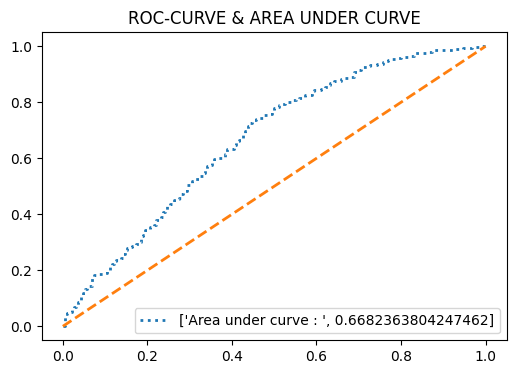

In [92]:
model(best_model_lr,X_train,y_train,X_val,y_val)

In [117]:
# Fit the best model one last time on the training set
best_model_lr.fit(X_selected, y)

LogisticRegression(C=10.0, fit_intercept=False, penalty='l1',
                   solver='liblinear')

In [95]:
test_X=test_df.drop(['customerid'],axis=1)
y_predict=best_model_lr.predict(test_X)
y_hat=pd.DataFrame(y_predict)
print('Sum of Good flags is ',y_hat.sum().values)

Sum of Good flags is  [1351]


In [ ]:
y_hat.to_csv('yhat.csv', index=False)

##Random Forest

In [96]:
# preprocessing
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
])

#Hyperparameter tuning
param_grid = {
    'max_samples': [0.5, 0.6, 0.7, 0.75],
    'min_samples_split': [2, 5, 10]
}

scorer = make_scorer(f1_score, average='macro')

# Perform cross-validated grid search for hyperparameter tuning
cv = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('classifier', RandomForestClassifier())]),
    param_grid, scoring=scorer, cv=cv
)
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, scoring=scorer, cv=cv)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model_rf = grid_search.best_estimator_

# Use the best model for predictions
y_pred = best_model_rf.predict(X_val)

# Compute the macro-average of F1 scores
f1_macro = f1_score(y_val, y_pred, average='macro')
print("Macro-Average F1 Score:", f1_macro)


Macro-Average F1 Score: 0.5716092717325998


RandomForestClassifier(max_samples=0.5)
Accuracy score :  0.7929061784897025
Recall score   :  0.8093480934809348
classification report :
               precision    recall  f1-score   support

           0       0.18      0.57      0.28        61
           1       0.96      0.81      0.88       813

    accuracy                           0.79       874
   macro avg       0.57      0.69      0.58       874
weighted avg       0.91      0.79      0.84       874



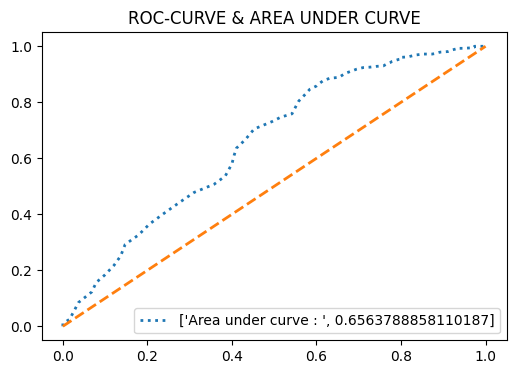

In [97]:
model(best_model_rf,X_train,y_train,X_val,y_val)

In [115]:
# Fit the best model one last time on the training set
best_model_rf.fit(X_selected, y)

RandomForestClassifier(max_samples=0.5)

In [116]:
test_X=test_df.drop(['customerid'],axis=1)
test_X_new = selector.transform(test_X)
y_predict=best_model_rf.predict(test_X_new)
y_hat=pd.DataFrame(y_predict)
print('Sum of Good flags is ',y_hat.sum().values)

Sum of Good flags is  [1281]


In [ ]:
y_hat.to_csv('yhat2.csv', index=False)

##XGBoost

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import make_scorer, f1_score
import xgboost as xgb

# preprocessing
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
])

# Hyperparameters tuning
param_grid = {
    'classifier__learning_rate': [0.3, 0.1, 0.01],
    'classifier__max_depth': [2, 5, 10],
    'classifier__max_bin': [100, 200, 250],
}

scorer = make_scorer(f1_score, average='macro')

# Cross Validation
cv = StratifiedKFold(n_splits=20, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('classifier', xgb.XGBClassifier(n_estimators=200))]),
    param_grid, scoring=scorer, cv=cv
)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_val)

f1_macro = f1_score(y_val, y_pred, average='macro')
print("Macro-Average F1 Score:", f1_macro)


Macro-Average F1 Score: 0.594950775178912


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=100, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                           

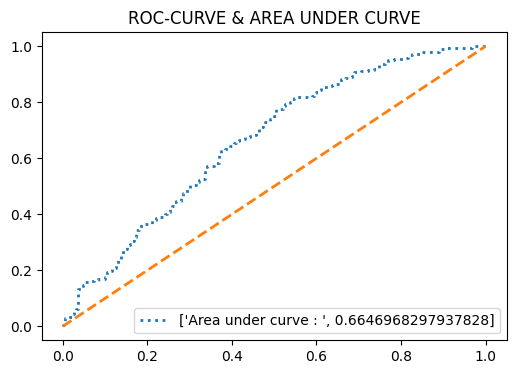

In [100]:
model(best_model,X_train,y_train,X_val,y_val)

In [111]:
# Fit the best model one last time on the training set
best_model.fit(X_selected, y)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.1,
                               max_bin=100, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=5, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=200,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [121]:
test_X=test_df.drop(['customerid'],axis=1)
test_X_new = selector.transform(test_X)
y_predict=best_model.predict(test_X_new)
y_hat=pd.DataFrame(y_predict)
print('Sum of Good flags is ',y_hat.sum().values)

Sum of Good flags is  [1267]


In [122]:
y_hat.to_csv('yhat8.csv', index=False)

In [118]:
ensemble = VotingClassifier(
    estimators=[
        ('random_forest', best_model_rf),
        ('logistic_regression', best_model_lr),
        ('xgboost', best_model)
    ],
    voting='hard'
)

ensemble.fit(X_selected, y)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(max_samples=0.5)),
                             ('logistic_regression',
                              LogisticRegression(C=10.0, fit_intercept=False,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('xgboost',
                              Pipeline(steps=[('preprocessor',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler())])),
                                              ('classifier',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=Non...
                                                             gpu_id=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=100,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=5,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...))]))])

In [125]:
test_X=test_df.drop(['customerid'],axis=1)
test_X_new = selector.transform(test_X)
y_predict=ensemble.predict(test_X_new)
y_hat=pd.DataFrame(y_predict)
print('Sum of Good flags is ',y_hat.sum().values)

Sum of Good flags is  [1302]


In [120]:
y_hat.to_csv('yhat7.csv', index=False)

Gradient Boosting Classifier

In [130]:
# preprocessing
preprocessor = Pipeline([
    ('scaler', StandardScaler()),
])

# Hyperparameters tuning
param_grid = {
    'classifier__learning_rate': [0.1, 0.05],
    'classifier__max_depth': [4,8],
    'classifier__min_samples_leaf': [50, 100],
}

scorer = make_scorer(f1_score, average='macro')

# Cross Validation
cv = StratifiedKFold(n_splits=15, shuffle=True, random_state=42)
grid_search = GridSearchCV(
    Pipeline([('preprocessor', preprocessor), ('classifier', GradientBoostingClassifier(n_estimators=200))]),
    param_grid, scoring=scorer, cv=cv
)
grid_search.fit(X_train, y_train)

# Best hyperparameters
best_params = grid_search.best_params_
best_model_gbc = grid_search.best_estimator_

y_pred = best_model_gbc.predict(X_val)

f1_macro = f1_score(y_val, y_pred, average='macro')
print("Macro-Average F1 Score:", f1_macro)


Macro-Average F1 Score: 0.5917241451301845


Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=4, min_samples_leaf=100,
                                            n_estimators=200))])
Accuracy score :  0.7951945080091534
Recall score   :  0.8128872366790583
classification report :
               precision    recall  f1-score   support

           0       0.21      0.58      0.30        67
           1       0.96      0.81      0.88       807

    accuracy                           0.80       874
   macro avg       0.58      0.70      0.59       874
weighted avg       0.90      0.80      0.84       874



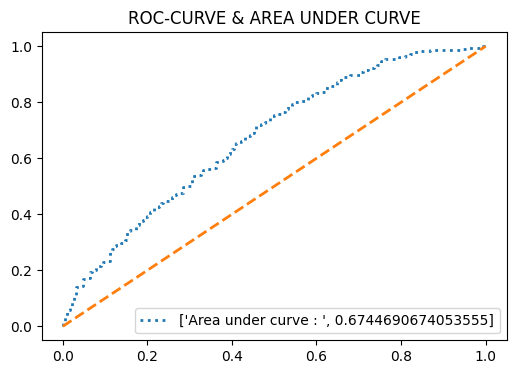

In [131]:
model(best_model_gbc,X_train,y_train,X_val,y_val)

In [132]:
# Fit the best model one last time on the training set
best_model_gbc.fit(X_selected, y)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('scaler', StandardScaler())])),
                ('classifier',
                 GradientBoostingClassifier(max_depth=4, min_samples_leaf=100,
                                            n_estimators=200))])

In [134]:
test_X=test_df.drop(['customerid'],axis=1)
test_X_new = selector.transform(test_X)
y_predict=best_model_gbc.predict(test_X_new)
y_hat=pd.DataFrame(y_predict)
print('Sum of Good flags is ',y_hat.sum().values)

Sum of Good flags is  [1276]


In [135]:
y_hat.to_csv('yhat9.csv', index=False)

In [136]:
ensemble2 = VotingClassifier(
    estimators=[
        ('random_forest', best_model_rf),
        ('logistic_regression', best_model_lr),
        ('xgboost', best_model),
        ('gradient boosting', best_model_gbc)
    ],
    voting='hard'
)

ensemble2.fit(X_selected, y)

VotingClassifier(estimators=[('random_forest',
                              RandomForestClassifier(max_samples=0.5)),
                             ('logistic_regression',
                              LogisticRegression(C=10.0, fit_intercept=False,
                                                 penalty='l1',
                                                 solver='liblinear')),
                             ('xgboost',
                              Pipeline(steps=[('preprocessor',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler())])),
                                              ('classifier',
                                               XGBClassifier(base_score=None,
                                                             booster=None,
                                                             callbacks=Non...
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...))])),
                             ('gradient boosting',
                              Pipeline(steps=[('preprocessor',
                                               Pipeline(steps=[('scaler',
                                                                StandardScaler())])),
                                              ('classifier',
                                               GradientBoostingClassifier(max_depth=4,
                                                                          min_samples_leaf=100,
                                                                          n_estimators=200))]))])

In [137]:
test_X=test_df.drop(['customerid'],axis=1)
test_X_new = selector.transform(test_X)
y_predict=ensemble2.predict(test_X_new)
y_hat=pd.DataFrame(y_predict)
print('Sum of Good flags is ',y_hat.sum().values)

Sum of Good flags is  [1279]


In [138]:
y_hat.to_csv('yhat10.csv', index=False)